# Telecom Churn Case Study

## Step 1 : Reading and Understanding Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression


In [2]:
# changing the default number of rows and columns to be displayed
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [3]:
# Reading dataset
df_orig = pd.read_csv('telecom_churn_data.csv')

In [4]:
# Printing shape of dataframe
df_orig.shape

(99999, 226)

In [5]:
# Printing top 5 rows
df_orig.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# Printing bottom 5 rows
df_orig.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [7]:
# checking for missing values
df_orig.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Statistical Analysis of columns
df_orig.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

**Observations:**

mobile_number is the customer identifier

In [9]:
# Checking column wise percentage of missing values 
columnwise_missing = round((df_orig.isnull().sum() / df_orig.shape[0]) * 100, 2)
columnwise_missing[columnwise_missing>0.0]

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

In [10]:
# getting columns with missing data of more than 70%
above_70percent_missing_data_col = df_orig.columns[columnwise_missing >= 70]
above_70percent_missing_data_col

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

## Step 2 : Data Cleaning and EDA

In [11]:
df = df_orig.copy()

### Drop columns with no variance

In [12]:
# dropping columns with no variance
no_var_cols = df.columns[df.eq(df.iloc[0]).all()].tolist()
no_var_cols

['circle_id', 'last_date_of_month_6']

In [13]:
# from the above observation, we can remove circle_id since it has the same value of "109" in all rows
df = df.drop(no_var_cols, axis=1)
df.shape

(99999, 224)

### Remove Postpaid variables

In [14]:
postpaid_var = ['jun_vbc_3g','jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g']
df = df.drop(postpaid_var, axis=1)

### Check for entire Null rows

In [15]:
df[df.isnull().all(1)]

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon


### Creating target column - churn and  dropping related columns

In [16]:
# Lets Derive churn variable
# Considering 9th month as our churn
# getting all the columns with _9 appended to the end of column name
columns_9th_month = df.filter(regex='_9').columns
columns_9th_month
print(len(columns_9th_month))

54


In [17]:
# observing columns with _9 in suffix
df[columns_9th_month]

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9
0,9/30/2014,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,6,0,0,9/28/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
1,9/30/2014,86.285,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,72.11,116.09,56.93,0.00,173.03,0.00,15.01,0.00,0.0,15.01,188.04,0.00,0.00,0.00,5,121,50,9/30/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,9/30/2014,290.714,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,8.76,9.28,0.0,0.0,18.04,0.0,42.08,0.0,124.94,148.23,38.98,158.19,345.41,49.44,118.18,3.86,0.0,171.49,517.74,0.45,0.01,0.36,7,358,100,9/29/2014,0,9/17/2014,1.0,46.0,1.0,0.0,46.0,0.00,8.42,2.84,0.00,0.0,0,1,0,0,1.0
3,9/30/2014,389.500,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,226.21,9.99,0.0,0.0,236.21,0.0,43.29,0.0,362.54,41.73,52.86,65.59,160.19,129.84,13.98,0.00,0.0,143.83,305.38,0.55,0.00,0.80,14,410,50,9/30/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,9/30/2014,163.426,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,0.00,0.00,0.0,0.0,0.00,0.0,5.98,0.0,104.59,154.56,48.24,0.00,202.81,2.31,0.00,0.00,0.0,2.31,205.31,0.18,0.00,0.00,4,200,50,9/28/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,9/30/2014,29.950,0.00,27.14,0.00,0.00,0.00,24.78,2.25,0.11,27.03,0.00,0.00,0.0,0.0,0.00,0.0,0.11,0.0,27.14,22.06,82.89,49.46,154.43,0.00,0.00,0.00,0.0,0.00,154.43,0.00,0.00,0.00,2,50,50,9/25/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
99995,9/30/2014,140.835,49.49,56.13,0.95,4.23,49.49,46.71,3.28,0.00,99.49,0.00,1.90,0.0,0.0,1.90,0.0,5.01,0.0,106.41,25.71,63.44,18.44,107.61,0.00,1.23,0.00,0.0,1.23,108.84,0.00,0.00,0.00,1,30,30,9/26/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
99996,9/30/2014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1,0,0,9/2/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
99997,9/30/2014,731.010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,2.21,0.00,2.21,0.00,0.00,0.00,0.0,0.00,2.21,0.00,0.00,0.00,6,862,252,9/17/2014,179,9/17/2014,4.0,252.0,0.0,4.0,862.0,85.67,4177.14,725.69,725.68,0.0,0,0,4,0,1.0


**Observations:**

From the above observaions:
1. total_og_mou_9 and total_ic_mou_9 gives us the total Minutes of usage - voice calls for incoming and  outgoing data.
2. vol_2g_mb_9 and vol_3g_mb_9 gives us the Mobile internet usage volume (in MB) for 2G and 3G network 



In [18]:
# Check for NULLs in target column variables
df[['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().sum()

total_og_mou_9    0
total_ic_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [19]:
# Creating churn variable
# If total_og_mou_9, total_ic_mou_9, vol_2g_mb_9 and vol_3g_mb_9 all have values 0, then customer is churned
# churn = 1 indicated customer has churned
churned_condition = ((df.total_og_mou_9 == 0) 
                     & (df.total_ic_mou_9 == 0) 
                     & (df.vol_2g_mb_9 == 0) 
                     & (df.vol_3g_mb_9 == 0))

In [20]:
# Creating churn variable
df['churn'] = churned_condition.astype(int)

In [21]:
#  checking total count of churn and non-churn in dataset
df.churn.value_counts()

0    89808
1    10191
Name: churn, dtype: int64

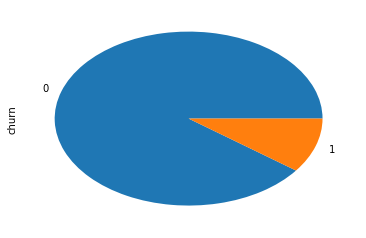

In [22]:
# Plotting pie chart to understand distribution of churn in dataset
df.churn.value_counts().plot(kind = 'pie')

In [23]:
# deleting columns that belong to churn month (belonging to 9th month or September month)
df = df.drop(columns_9th_month, axis=1)

In [24]:
# Removed 55 columns related to month 9
# Checking shape of dataset
df.shape

(99999, 167)

### Checking columns with more than 70% missing data and removing or imputing missing values/columns

In [25]:
# getting columns with missing data of more than 70%
columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)
above_70percent_missing_data_col = df.columns[columnwise_missing >= 70]
print(above_70percent_missing_data_col)
print("Number of columns with more than 70% missing values : ")
print(above_70percent_missing_data_col.shape[0])

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')
Number of columns with more than 70% missing values : 
30


In [26]:
# above, we see there are many columns related to recharge which has na values
# This may be because no recharges were done 
# lets observe only the above columns
df[above_70percent_missing_data_col].head(10)

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,1.0,1.0,1.0
1,NaN,7/25/2014,8/10/2014,NaN,1.0,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,NaN,154.0,50.0,NaN,0.00,0.00,NaN,28.61,7.60,NaN,0.0,0.0,NaN,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,NaN,NaN,1.0,NaN,NaN,56.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,56.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,7/31/2014,8/23/2014,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,NaN,0.00,19.83,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1.0,1.0
9,NaN,7/23/2014,NaN,NaN,1.0,NaN,NaN,154.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,154.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,1.0,NaN


In [27]:
# we can remove the date columns since we have other columns which can compensate for the removed date columns
columns_date = df.filter(regex='date').columns
print(columns_date)
print(columns_date.shape[0])

# dropping the 8 date columns
df = df.drop(columns_date, axis=1)

Index(['last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')
8


In [28]:
# checking shape of dataframe after dropping date columns
df.shape

(99999, 159)

In [29]:
# getting columns with missing data of more than 70%
columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)
above_70percent_missing_data_col = df.columns[columnwise_missing >= 70]
print(above_70percent_missing_data_col)
print("Number of columns with more than 70% missing values : ")
print(above_70percent_missing_data_col.shape[0])

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')
Number of columns with more than 70% missing values : 
27


In [30]:
# filtering only recharge columns to understand different recharge related columns in dataset
columns_rech = df.filter(regex='rech').columns
print(columns_rech)
print(columns_rech.shape[0])

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')
24


In [31]:
# total_rech_data_6 has more than 70% of missing values
# creating a separate list of columns for 6th month more than 70% missing value columns
above_70percent_6th_mon_missing_data_col = ['total_rech_data_6', 'max_rech_data_6',
                                'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 
                                'arpu_3g_6', 'arpu_2g_6']

# checking if all columns related to recharge for missing value total_rech_data_6 rows also have missing values
print(df[above_70percent_6th_mon_missing_data_col].isna().sum())
df[above_70percent_6th_mon_missing_data_col]

total_rech_data_6     74846
max_rech_data_6       74846
count_rech_2g_6       74846
count_rech_3g_6       74846
av_rech_amt_data_6    74846
arpu_3g_6             74846
arpu_2g_6             74846
dtype: int64


,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6
0,1.0,252.0,0.0,1.0,252.0,212.17,212.17
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,56.0,1.0,0.0,56.0,0.00,0.00
...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.0,25.0,2.0,0.0,39.0,141.48,2.40
99997,3.0,202.0,1.0,2.0,583.0,235.68,235.68


**Obseravtions:**

1. We observe that all columns related to data recharge, night pack and average revenue per user for 2g/3g data have the same number of missing values. 
2. Also after observing first 5 and last 5  rows, we see that all these columns have the same rows of missing values. 

In [32]:
# From our above observations, replacing NaN values in recharge columns of 6th month with 0
# Replacing with 0, since NaN does not neccesarily mean missing values. It implies no recharge.
df[above_70percent_6th_mon_missing_data_col] = df[above_70percent_6th_mon_missing_data_col].fillna(0.0)

# checking if missing values have been replaced with 0
print(df[above_70percent_6th_mon_missing_data_col].isna().sum())
df[above_70percent_6th_mon_missing_data_col]

total_rech_data_6     0
max_rech_data_6       0
count_rech_2g_6       0
count_rech_3g_6       0
av_rech_amt_data_6    0
arpu_3g_6             0
arpu_2g_6             0
dtype: int64


,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6
0,1.0,252.0,0.0,1.0,252.0,212.17,212.17
1,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,0.0,0.0,0.0,0.0,0.0,0.00,0.00
4,1.0,56.0,1.0,0.0,56.0,0.00,0.00
...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,0.0,0.0,0.00,0.00
99995,0.0,0.0,0.0,0.0,0.0,0.00,0.00
99996,2.0,25.0,2.0,0.0,39.0,141.48,2.40
99997,3.0,202.0,1.0,2.0,583.0,235.68,235.68


In [33]:
# total_rech_data_7 has more than 70% of missing values
# creating a separate list of columns for 7th month more than 70% missing value columns
above_70percent_7th_mon_missing_data_col = ['total_rech_data_7', 'max_rech_data_7',
                                'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 
                                'arpu_3g_7', 'arpu_2g_7']

# checking if all columns related to recharge for missing value total_rech_data_7 rows also have missing values
df[above_70percent_7th_mon_missing_data_col].isna().sum()

total_rech_data_7     74428
max_rech_data_7       74428
count_rech_2g_7       74428
count_rech_3g_7       74428
av_rech_amt_data_7    74428
arpu_3g_7             74428
arpu_2g_7             74428
dtype: int64

In [34]:
# From our above observations, replacing NaN values in recharge columns of 7th month with 0
# Replacing with 0, since NaN does not neccesarily mean missing values. It implies no recharge.
df[above_70percent_7th_mon_missing_data_col] = df[above_70percent_7th_mon_missing_data_col].fillna(0.0)

# checking if missing values have been replaced with 0
print(df[above_70percent_7th_mon_missing_data_col].isna().sum())

total_rech_data_7     0
max_rech_data_7       0
count_rech_2g_7       0
count_rech_3g_7       0
av_rech_amt_data_7    0
arpu_3g_7             0
arpu_2g_7             0
dtype: int64


In [35]:
# total_rech_data_8 has more than 70% of missing values
# creating a separate list of columns for 8th month more than 70% missing value columns
above_70percent_8th_mon_missing_data_col = ['total_rech_data_8', 'max_rech_data_8',
                                'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 
                                'arpu_3g_8', 'arpu_2g_8']

# checking if all columns related to recharge for missing value total_rech_data_8 rows also have missing values
df[above_70percent_8th_mon_missing_data_col].isna().sum()

total_rech_data_8     73660
max_rech_data_8       73660
count_rech_2g_8       73660
count_rech_3g_8       73660
av_rech_amt_data_8    73660
arpu_3g_8             73660
arpu_2g_8             73660
dtype: int64

In [36]:
# From our above observations, replacing NaN values in recharge columns of 8th month with 0
# Replacing with 0, since NaN does not neccesarily mean missing values. It implies no recharge.
df[above_70percent_8th_mon_missing_data_col] = df[above_70percent_8th_mon_missing_data_col].fillna(0.0)

# checking if missing values have been replaced with 0
print(df[above_70percent_8th_mon_missing_data_col].isna().sum())

total_rech_data_8     0
max_rech_data_8       0
count_rech_2g_8       0
count_rech_3g_8       0
av_rech_amt_data_8    0
arpu_3g_8             0
arpu_2g_8             0
dtype: int64


### Categorical variables

In [37]:
#  categorical variables with missing values more than 70%
cat_vars = ['fb_user_8', 'fb_user_6', 'fb_user_7', 'night_pck_user_8', 'night_pck_user_6', 'night_pck_user_7']

In [38]:
# replacing missing values of above categories with new category : 2
df['fb_user_8'] = df['fb_user_8'].fillna(2)
df['fb_user_6'] = df['fb_user_6'].fillna(2)
df['fb_user_7'] = df['fb_user_7'].fillna(2)
df['night_pck_user_8']= df['night_pck_user_8'].fillna(2)
df['night_pck_user_7']= df['night_pck_user_7'].fillna(2)
df['night_pck_user_6']= df['night_pck_user_6'].fillna(2)

In [39]:
# Converting categorical variables from float to object
df[cat_vars] = df[cat_vars].astype(int).astype(object)

In [40]:
# checking value count of one of the categorical variable fb_user_8
df.fb_user_8.value_counts()

2    73660
1    23463
0     2876
Name: fb_user_8, dtype: int64

In [41]:
# getting columns with missing data of more than 70%
columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)
above_70percent_missing_data_col = df.columns[columnwise_missing >= 70]
print(above_70percent_missing_data_col)
print("Number of columns with more than 70% missing values : ")
print(above_70percent_missing_data_col.shape[0])

Index([], dtype='object')
Number of columns with more than 70% missing values : 
0


**Observations:**

We don't have any columns with more than 70% missing values anymore

### Analysing Dataset to remove more columns

In [42]:
# Statistical Analysis of columns
df.describe(include='all')

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,churn
count,9.999900e+04,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000

In [43]:
# Printing value counts of columns with same values in all rows based on above observations
print("---------------")
print(df.loc_og_t2o_mou.value_counts())

print("---------------")
print(df.std_og_t2o_mou.value_counts())

print("---------------")
print(df.loc_ic_t2o_mou.value_counts())

print("---------------")
print(df.std_og_t2c_mou_6.value_counts())

print("---------------")
print(df.std_og_t2c_mou_7.value_counts())

print("---------------")
print(df.std_og_t2c_mou_8.value_counts())

print("---------------")
print(df.std_ic_t2o_mou_6.value_counts())

print("---------------")
print(df.std_ic_t2o_mou_7.value_counts())

print("---------------")
print(df.std_ic_t2o_mou_8.value_counts())


drop_columns = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
               'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 
               'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

---------------
0.0    98981
Name: loc_og_t2o_mou, dtype: int64
---------------
0.0    98981
Name: std_og_t2o_mou, dtype: int64
---------------
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
---------------
0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
---------------
0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
---------------
0.0    94621
Name: std_og_t2c_mou_8, dtype: int64
---------------
0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
---------------
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
---------------
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64


In [44]:
# dropping the columns with same values in all rows
df = df.drop(drop_columns, axis = 1)
df.shape

(99999, 150)

### Handling Missing Data 

In [45]:
# checking columnwise missing values
columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)

columnwise_missing = pd.DataFrame(columnwise_missing, columns=['missing %'])
columnwise_missing = columnwise_missing.reset_index()
columnwise_missing.sort_values(by='missing %', ascending=False)

,index,missing %
75,std_ic_t2f_mou_8,5.38
51,og_others_8,5.38
27,loc_og_t2c_mou_8,5.38
30,loc_og_mou_8,5.38
33,std_og_t2t_mou_8,5.38
36,std_og_t2m_mou_8,5.38
39,std_og_t2f_mou_8,5.38
42,std_og_mou_8,5.38
45,isd_og_mou_8,5.38
48,spl_og_mou_8,5.38


In [46]:
# Displaying columns with highest number of missing values 
columnwise_missing.sort_values(by='missing %', ascending=False)[0:27]

,index,missing %
75,std_ic_t2f_mou_8,5.38
51,og_others_8,5.38
27,loc_og_t2c_mou_8,5.38
30,loc_og_mou_8,5.38
33,std_og_t2t_mou_8,5.38
36,std_og_t2m_mou_8,5.38
39,std_og_t2f_mou_8,5.38
42,std_og_mou_8,5.38
45,isd_og_mou_8,5.38
48,spl_og_mou_8,5.38


**Observations** :

1. All columns with the missing value of 5.38% belongs to 8th month
2. All the above columns are related to outgoing or incoming calls

In [47]:
# Checking if the above columns have missing values of 5.38% for the same rows
missing_values_8th = columnwise_missing.sort_values(by='missing %', ascending=False)[0:27]
missing_values_8th = list(missing_values_8th['index'])

df[missing_values_8th].tail(20)

,std_ic_t2f_mou_8,og_others_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,loc_ic_t2m_mou_8,loc_og_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,loc_og_t2f_mou_8,loc_ic_t2t_mou_8,offnet_mou_8,loc_og_t2t_mou_8,roam_ic_mou_8,onnet_mou_8,roam_og_mou_8
99979,10.23,0.0,0.00,33.41,0.00,0.00,3.39,3.39,0.0,0.00,12.33,18.01,17.16,46.06,0.00,0.65,10.88,0.0,0.00,0.00,0.00,16.56,21.41,15.39,0.00,15.39,0.00
99980,0.00,0.0,0.00,138.31,13.21,173.76,0.00,186.98,0.0,4.21,64.44,88.46,27.76,105.63,22.18,20.89,43.08,0.0,0.00,0.00,0.41,13.41,273.14,49.43,17.81,62.64,10.49
99981,0.00,0.0,0.00,150.59,14.01,0.00,0.00,14.01,0.0,0.08,58.54,55.59,40.41,402.58,17.36,0.00,17.36,0.0,0.00,0.51,5.76,303.61,61.44,89.23,0.00,103.24,0.00
99982,0.00,0.0,0.00,23.48,0.00,0.00,0.00,0.00,0.0,0.00,33.81,12.44,15.53,63.24,0.00,0.00,0.00,0.0,0.58,0.00,0.91,13.89,13.36,10.11,0.00,10.11,0.00
99983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99984,0.00,0.0,7.28,16.69,0.00,0.00,0.00,0.00,0.0,7.28,81.86,10.98,0.00,102.81,0.00,0.00,0.00,0.0,0.00,0.00,0.00,20.94,18.26,5.71,0.00,5.71,0.00
99985,0.00,0.0,0.00,43.91,0.00,0.00,0.00,0.00,0.0,0.00,170.21,21.81,0.00,176.86,0.00,0.00,0.00,0.0,0.00,0.00,0.00,6.64,21.81,22.09,0.00,22.09,0.00
99986,0.45,0.0,9.15,1225.06,56.84,88.94,0.00,145.79,0.0,9.15,450.01,493.48,37.61,635.84,0.00,23.71,24.16,0.0,0.00,0.00,13.01,148.21,595.44,718.56,0.00,775.41,0.00
99987,0.00,0.0,0.00,52.31,0.86,0.00,0.00,0.86,0.0,6.38,56.23,35.89,0.00,74.09,8.75,0.00,8.75,0.0,0.00,0.00,0.00,17.86,35.89,16.41,0.00,17.28,0.00
99988,0.71,0.0,0.01,130.48,0.00,120.29,0.00,120.29,0.0,0.01,1122.83,128.01,20.31,1144.64,2.03,86.11,88.86,0.0,0.00,0.31,0.00,1.50,248.33,2.46,0.00,2.46,0.00


### Check for all missing columns NULL with no churn 

In [48]:
# Removing rows where all values of above columns have NaN and churn = 0
df_miss_8 = df[missing_values_8th]
df = df[~((df_miss_8.isnull().all(1)) & (df.churn==0))]

In [49]:
# Finding median for all the columns with missing values for 8th month
median_8 = df[missing_values_8th].median()

In [50]:
# Replacing missing values for above columns related to 8th month with median
df[missing_values_8th] = df[missing_values_8th].fillna(median_8)

In [51]:
# Displaying columns with 2nd highest number of missing values 
columnwise_missing.sort_values(by='missing %', ascending=False)[27:54]

,index,missing %
67,std_ic_t2t_mou_6,3.94
55,loc_ic_t2t_mou_6,3.94
7,offnet_mou_6,3.94
58,loc_ic_t2m_mou_6,3.94
64,loc_ic_mou_6,3.94
10,roam_ic_mou_6,3.94
73,std_ic_t2f_mou_6,3.94
49,og_others_6,3.94
61,loc_ic_t2f_mou_6,3.94
46,spl_og_mou_6,3.94


**Observations** :

1. All columns with the missing value of 3.94% belongs to 6th month
2. All the above columns are related to outgoing or incoming calls

In [52]:
# Checking if the above columns have missing values of 3.94% for the same rows
missing_values_6th = columnwise_missing.sort_values(by='missing %', ascending=False)[27:54]
missing_values_6th = list(missing_values_6th['index'])
df[missing_values_6th].head()

,std_ic_t2t_mou_6,loc_ic_t2t_mou_6,offnet_mou_6,loc_ic_t2m_mou_6,loc_ic_mou_6,roam_ic_mou_6,std_ic_t2f_mou_6,og_others_6,loc_ic_t2f_mou_6,spl_og_mou_6,roam_og_mou_6,std_ic_mou_6,std_ic_t2m_mou_6,loc_og_t2f_mou_6,isd_og_mou_6,loc_og_t2m_mou_6,std_og_mou_6,spl_ic_mou_6,std_og_t2f_mou_6,loc_og_t2t_mou_6,std_og_t2m_mou_6,onnet_mou_6,isd_ic_mou_6,loc_og_t2c_mou_6,std_og_t2t_mou_6,loc_og_mou_6,ic_others_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,1.61,15.74,17.48,19.09,0.0,0.00,0.00,0.00,4.68,0.0,5.90,5.90,0.00,0.0,11.51,0.23,0.00,0.00,23.88,0.00,24.11,1.83,0.0,0.23,35.39,0.00
2,72.41,115.69,143.33,14.38,229.56,0.0,21.73,0.45,99.48,46.56,0.0,139.33,45.18,24.11,0.0,29.34,47.64,0.21,1.48,7.19,41.81,11.54,0.00,0.0,4.34,60.66,0.93
3,43.48,62.08,123.31,113.96,233.48,0.0,1.18,0.00,57.43,10.96,0.0,45.99,1.33,1.91,0.0,107.43,29.23,0.59,0.00,73.68,2.99,99.91,0.00,0.0,26.23,183.03,0.00
4,0.00,105.68,76.96,106.84,214.03,0.0,0.00,0.00,1.50,0.00,0.0,1.93,1.93,0.00,0.0,67.64,9.31,0.00,0.00,50.31,9.31,50.31,0.00,0.0,0.00,117.96,0.48


In [53]:
# Removing rows where all values of above columns have NaN and churn = 0
df_miss_6 = df[missing_values_6th]
df = df[~((df_miss_6.isnull().all(1)) & (df.churn==0))]

In [54]:
# Finding median for all the columns with missing values for 6th month
median_6 = df[missing_values_6th].median()

In [55]:
# Replacing missing values for above columns related to 6th month with median computed above
df[missing_values_6th] = df[missing_values_6th].fillna(median_6)

In [56]:
# Displaying columns with next highest number of missing values 
columnwise_missing.sort_values(by='missing %', ascending=False)[54:81]

,index,missing %
65,loc_ic_mou_7,3.86
89,ic_others_7,3.86
8,offnet_mou_7,3.86
5,onnet_mou_7,3.86
23,loc_og_t2f_mou_7,3.86
86,isd_ic_mou_7,3.86
77,std_ic_mou_7,3.86
83,spl_ic_mou_7,3.86
74,std_ic_t2f_mou_7,3.86
71,std_ic_t2m_mou_7,3.86


**Observations** :

1. All columns with the missing value of 3.86% belongs to 7th month
2. All the above columns are related to outgoing or incoming calls

In [57]:
# Checking if the above columns have missing values of 3.86% for the same rows
missing_values_7th = columnwise_missing.sort_values(by='missing %', ascending=False)[54:81]
missing_values_7th = list(missing_values_7th['index'])
df[missing_values_7th].head()

,loc_ic_mou_7,ic_others_7,offnet_mou_7,onnet_mou_7,loc_og_t2f_mou_7,isd_ic_mou_7,std_ic_mou_7,spl_ic_mou_7,std_ic_t2f_mou_7,std_ic_t2m_mou_7,std_ic_t2t_mou_7,loc_ic_t2f_mou_7,roam_og_mou_7,std_og_t2t_mou_7,loc_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_t2m_mou_7,loc_ic_t2m_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,roam_ic_mou_7,loc_ic_t2t_mou_7,loc_og_mou_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104.23,0.00,99.84,78.68,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.93,0.00,4.11,74.56,0.46,0.00,2.91,75.94,65.38,4.58,0.0,23.43,0.0,0.00,29.91,150.51
2,208.86,3.14,220.59,55.24,21.79,0.85,306.66,0.0,58.34,177.01,71.29,122.29,0.00,26.49,28.74,67.41,14.76,135.54,16.86,15.44,108.68,0.0,236.84,0.0,0.00,71.11,67.41
3,111.59,0.00,109.01,54.39,0.65,0.00,105.01,0.0,0.00,38.56,66.44,27.09,28.09,14.89,34.81,1.73,0.00,0.00,83.21,64.51,16.63,0.0,0.00,0.0,54.86,19.98,118.68
4,198.04,0.00,91.88,149.44,0.00,0.00,0.25,0.0,0.00,0.25,0.00,0.00,0.00,0.00,149.44,0.00,0.00,0.00,91.88,109.54,0.00,0.0,0.00,0.0,0.00,88.49,241.33


In [58]:
# Removing rows where all values of above columns have NaN and churn = 0
df_miss_7 = df[missing_values_7th]
df = df[~((df_miss_7.isnull().all(1)) & (df.churn==0))]

In [59]:
# Finding median for all the columns with missing values for 7th month
median_7 = df[missing_values_7th].median()

In [60]:
# Replacing missing values for above columns related to 7th month with median computed above
df[missing_values_7th] = df[missing_values_7th].fillna(median_7)

In [61]:
# Checking if there any more missing values in dataframe

columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)
columnwise_missing = df.columns[columnwise_missing > 0]
print(columnwise_missing)
print("Number of columns with missing data")
print(columnwise_missing.shape[0])

Index([], dtype='object')
Number of columns with missing data
0


**Description:**

There are no more missing values in the dataframe

In [62]:
# Checking the shape of dataframe
df.shape

(96021, 150)

In [63]:
# feature information
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96021 entries, 0 to 99998
Data columns (total 150 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

### Feature Creation And Filtering High Value Customers

Use 6th and 7th month data to figure out High Value Customers

In [64]:
# Creating new feature - total_rech_data_6
df['recharge_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6
# Creating new feature - total_rech_data_7
df['recharge_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7

# calculating average recharge done by customer in June and July Month (6th and 7h Month)

df['avg_recharge_6_7'] = (df.recharge_data_6 + df.recharge_data_7 
                          + df.total_rech_amt_6 + df.total_rech_amt_7)/2

In [65]:
# dropping features created to compute avg_recharge_6_7
df = df.drop(['recharge_data_6', 'recharge_data_7'], axis=1)

In [66]:
# Checking the shape of dataframe
df.shape

(96021, 151)

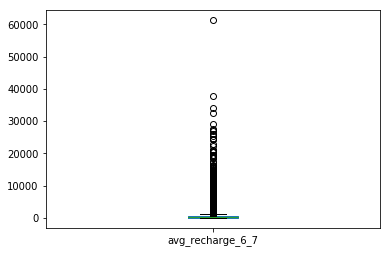

In [67]:
# Plotting Boxplot to check distribution of average recharge for 6th and 7th month
df.avg_recharge_6_7.plot(kind='box')
plt.show()

In [68]:
#  Filtering rows which have more than 70th percentile of avg_recharge_6_7
df = df[df.avg_recharge_6_7 >= df.avg_recharge_6_7.quantile(0.7)]
# Checking shape of dataframe
df.shape

(28837, 151)

### Categorical variables

In [69]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28837 entries, 0 to 99997
Data columns (total 151 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

### Convert to categorical variables

In [70]:
df.mobile_number = df.mobile_number.astype('object')
df.churn = df.churn.astype('uint8')

### One-Hot Encoding 

In [71]:
# Displayin categorical variables
cat_vars

['fb_user_8',
 'fb_user_6',
 'fb_user_7',
 'night_pck_user_8',
 'night_pck_user_6',
 'night_pck_user_7']

In [72]:
# One hot encoding for categorical variables
for cols in cat_vars:
    temp_cols = pd.get_dummies(df[cols], prefix=cols, drop_first=True)
    df = pd.concat([df, temp_cols], axis=1)
    df = df.drop(cols, axis=1)

In [73]:
# checking if dummy variables are created for categorical variables
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28837 entries, 0 to 99997
Data columns (total 157 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       object 
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

### Univariate And Bivariate Analysis to Understand the Dataset Better

In [74]:
# feature type summary

df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28837 entries, 0 to 99997
Data columns (total 157 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       object 
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [75]:
# looking at data statistics

df.describe(include = 'all')

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn,avg_recharge_6_7,fb_user_8_1,fb_user_8_2,fb_user_6_1,fb_user_6_2,fb_user_7_1,fb_user_7_2,night_pck_user_8_1,night_pck_user_8_2,night_pck_user_6_1,night_pck_user_6_2,night_pck_user_7_1,night_pck_user_7_2
count,2.883700e+04,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837

In [76]:
# Creating a function for barplot
def barplot(y_value):
    ax = sns.barplot(x='churn', y=y_value, data=df, estimator=np.mean )
    return ax

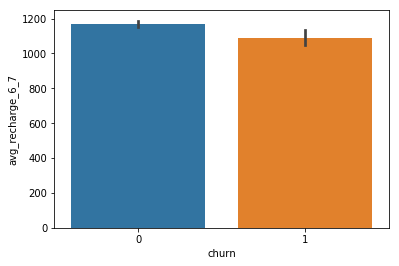

In [77]:
# barplot of average recharge of 6th and 7th month vs churn status
barplot('avg_recharge_6_7')

**Observations:**

Churn is less if Average recharge amount for 6th and 7th month are more 

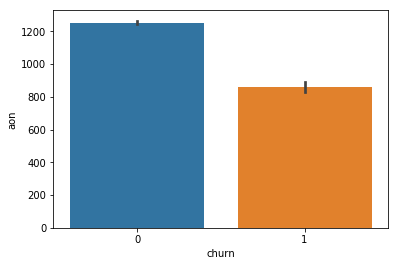

In [78]:
# barplot of Age on network - number of days the customer is using the operator T network vs Churn status
barplot('aon')

**Observations:**

Lesser age on network more probability of customer churn

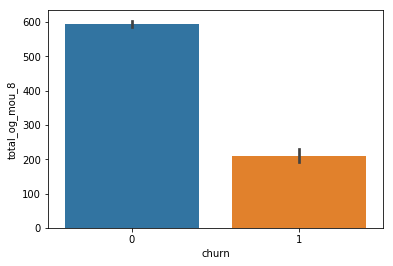

In [79]:
# barplot of Total Outgoing Minutes of usage - (voice calls) vs churn
barplot('total_og_mou_8')

**Observatiobs:**

Lesser the outgoing minutes of usage for voice calls more probability of customer churn

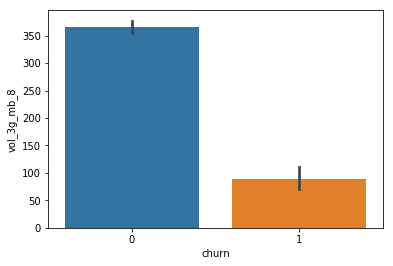

In [80]:
# barplot of 3g Mobile internet usage volume (in MB) vs churn
barplot('vol_3g_mb_8')

**Description:**
Lesser 3g Mobile internet usage volume (in MB), more probability of customer churn.

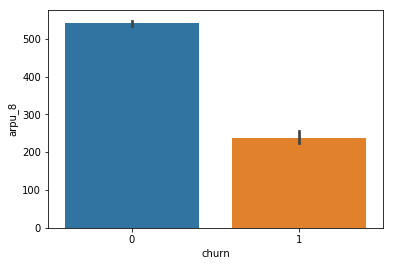

In [81]:
# barplot of Average revenue per user 8th month vs churn
barplot('arpu_8')

**Observations:**

Lesser Average revenue per user 8th month, more probability of customer churn

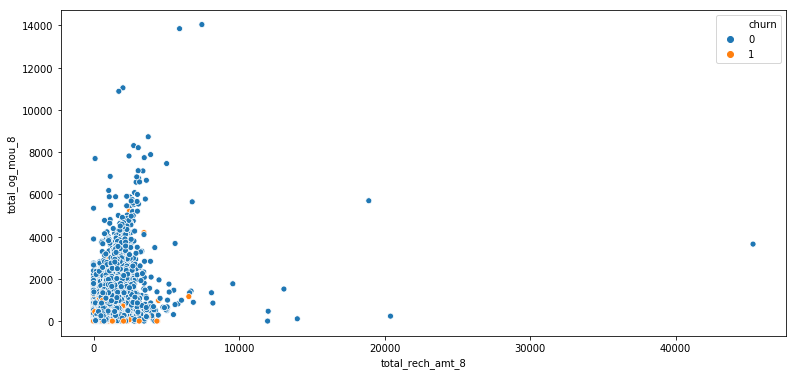

In [82]:
# checking scatter plot of total recharge amount vs total outgoing with churn as hue
plt.figure(figsize=(13,6))
sns.scatterplot(data=df, x="total_rech_amt_8", y="total_og_mou_8", hue="churn")

**Observations:**
People with less outgoing calls in 8th month have churned.

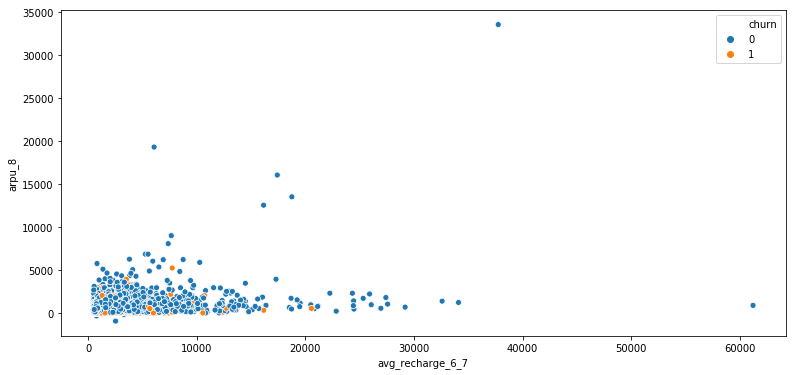

In [83]:
# checking scatter plot of avg_recharge_6_7 vs arpu_8 with churn as hue
plt.figure(figsize=(13,6))
sns.scatterplot(data=df, x="avg_recharge_6_7", y="arpu_8", hue="churn")


**Observations:**
When Average revenue per user for 8th month is less, we see more people churned

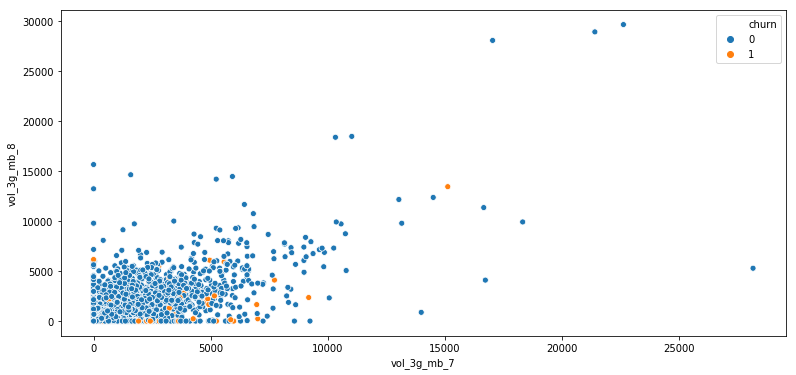

In [84]:
# checking scatter plot of vol_3g_mb_7 vs vol_3g_mb_8 with churn as hue
plt.figure(figsize=(13,6))
sns.scatterplot(data=df, x="vol_3g_mb_7", y="vol_3g_mb_8", hue="churn")

**Observations:**
More churned when 3g volume usage for 8th month is less as compared to 3g volume usage for 7th month

### Feature Engineering

In [85]:
df['arpu_diff'] = df.arpu_8 - ((df.arpu_6 + df.arpu_7)/2)

df['onnet_mou_diff'] = df.onnet_mou_8 - ((df.onnet_mou_6 + df.onnet_mou_7)/2)

df['offnet_mou_diff'] = df.offnet_mou_8 - ((df.offnet_mou_6 + df.offnet_mou_7)/2)

df['roam_ic_mou_diff'] = df.roam_ic_mou_8 - ((df.roam_ic_mou_6 + df.roam_ic_mou_7)/2)

df['roam_og_mou_diff'] = df.roam_og_mou_8 - ((df.roam_og_mou_6 + df.roam_og_mou_7)/2)

df['loc_og_mou_diff'] = df.loc_og_mou_8 - ((df.loc_og_mou_6 + df.loc_og_mou_7)/2)

df['std_og_mou_diff'] = df.std_og_mou_8 - ((df.std_og_mou_6 + df.std_og_mou_7)/2)

df['isd_og_mou_diff'] = df.isd_og_mou_8 - ((df.isd_og_mou_6 + df.isd_og_mou_7)/2)

df['spl_og_mou_diff'] = df.spl_og_mou_8 - ((df.spl_og_mou_6 + df.spl_og_mou_7)/2)

df['total_og_mou_diff'] = df.total_og_mou_8 - ((df.total_og_mou_6 + df.total_og_mou_7)/2)

df['loc_ic_mou_diff'] = df.loc_ic_mou_8 - ((df.loc_ic_mou_6 + df.loc_ic_mou_7)/2)

df['std_ic_mou_diff'] = df.std_ic_mou_8 - ((df.std_ic_mou_6 + df.std_ic_mou_7)/2)

df['isd_ic_mou_diff'] = df.isd_ic_mou_8 - ((df.isd_ic_mou_6 + df.isd_ic_mou_7)/2)

df['spl_ic_mou_diff'] = df.spl_ic_mou_8 - ((df.spl_ic_mou_6 + df.spl_ic_mou_7)/2)

df['total_ic_mou_diff'] = df.total_ic_mou_8 - ((df.total_ic_mou_6 + df.total_ic_mou_7)/2)

df['total_rech_num_diff'] = df.total_rech_num_8 - ((df.total_rech_num_6 + df.total_rech_num_7)/2)

df['total_rech_amt_diff'] = df.total_rech_amt_8 - ((df.total_rech_amt_6 + df.total_rech_amt_7)/2)

df['max_rech_amt_diff'] = df.max_rech_amt_8 - ((df.max_rech_amt_6 + df.max_rech_amt_7)/2)

df['total_rech_data_diff'] = df.total_rech_data_8 - ((df.total_rech_data_6 + df.total_rech_data_7)/2)

df['max_rech_data_diff'] = df.max_rech_data_8 - ((df.max_rech_data_6 + df.max_rech_data_7)/2)

df['av_rech_amt_data_diff'] = df.av_rech_amt_data_8 - ((df.av_rech_amt_data_6 + df.av_rech_amt_data_7)/2)

df['vol_2g_mb_diff'] = df.vol_2g_mb_8 - ((df.vol_2g_mb_6 + df.vol_2g_mb_7)/2)

df['vol_3g_mb_diff'] = df.vol_3g_mb_8 - ((df.vol_3g_mb_6 + df.vol_3g_mb_7)/2)

## Step 3 : Data Preparation - Preparing Data for Modelling

### Outliers Treatment

In [86]:
# Copying dataframe
df_1 = df.copy()

In [87]:
# Checking shape of dataframe
df_1.shape

(28837, 180)

In [88]:
# Selecting continuous variables
df_numeric = df_1.select_dtypes(include=['float64', 'int64'])

In [89]:
# Quantile-based Flooring and Capping
df_numeric.describe().loc[['mean','50%', 'min', 'max']]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,avg_recharge_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
mean,567.343044,568.713895,515.794061,266.890756,273.527462,240.080769,383.092176,387.305512,344.58456,16.453513,12.964345,12.803773,27.265029,20.605623,20.368642,86.681422,87.885704,80.323104,167.379468,167.106579,156.408475,6.493393,6.578112,6.040839,1.602024,1.920324,1.729419,260.626496,261.666868,243.096069,169.373635,177.409984,151.424276,183.716637,192.06388,160.287848,1.832864,1.867842,1.621237,354.96714,371.399695,313.529298,2.211596,2.131855,1.9567,5.93472,7.241161,6.671732,0.672358,0.044558,0.059509,624.017246,641.926287,563.310451,66.943577,68.271875,64.569256,154.093432,155.533884,151.182356,15.658657,16.452723,14.798578,236.806125,240.409741,231.064912,15.234884,15.767954,14.181394,29.910926,31.581433,28.606277,2.771345,2.882545,2.636628,47.941127,50.265048,45.532155,296.424859,303.547538,286.286745,0.062176,0.019926,0.026738,10.941081,12.054226,11.105182,1.18355,1.539364,1.254244,12.037695,11.878108,10.113673,671.370392,669.556369,592.691057,169.409578,171.748691,160.410688,100.623678,100.235357,92.379096,1.684537,1.869577,1.634047,76.491452,78.117245,71.128515,1.262129,1.417554,1.224989,0.422409,0.452023,0.409058,128.908105,137.96943,120.630679,128.255197,126.648643,106.828424,333.833093,360.508141,343.051035,64.977913,66.780172,61.14334,61.308584,62.706095,56.656271,0.176683,0.184693,0.155391,1.085446,1.232861,1.069598,0.211499,0.222804,0.20654,0.21091,0.229219,0.202518,1220.815203,1163.227672,-52.234408,-30.12834,-40.614283,-1.905156,-3.566683,-18.050613,-49.65412,-0.215025,0.083792,-69.66

In [90]:
# Find the 90th and 10th quantile for numeric variables and clip the outliers
df_quantile_10 = df_numeric.quantile(0.10)
df_quantile_90 = df_numeric.quantile(0.90)

In [91]:
# clipping outliers
for cols in df_numeric.columns:
    df_1[cols] = df_1[cols].apply(lambda x: df_quantile_90[cols] if x > df_quantile_90[cols] else (df_quantile_10[cols] if x < df_quantile_10[cols] else x) )

In [92]:
# statistical analysis
df_1.describe().loc[['mean','50%', 'min', 'max']]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn,avg_recharge_6_7,fb_user_8_1,fb_user_8_2,fb_user_6_1,fb_user_6_2,fb_user_7_1,fb_user_7_2,night_pck_user_8_1,night_pck_user_8_2,night_pck_user_6_1,night_pck_user_6_2,night_pck_user_7_1,night_pck_user_7_2,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
mean,529.23162,529.844423,474.10193,206.33219,210.697748,175.237619,324.411315,327.388568,286.107147,3.963475,1.884385,2.047193,7.299874,4.148405,3.890462,53.586488,54.044472,49.798585,135.811404,137.338786,126.89162,3.431545,3.498825,3.192234,0.670231,0.811562,0.724994,212.950389,215.200441,198.378529,110.660257,116.901438,88.936796,121.616169,128.375496,98.577426,0.225674,0.214283,0.169147,285.618273,298.220993,238.113989,0.0,0.0,0.0,3.634576,4.614263,4.122943,0.343142,0.0,0.0,551.799256,566.333213,485.042612,45.784,46.58232,43.530168,126.356041,127.906361,124.116723,8.887688,9.294395,8.519866,198.257416,201.525199,193.386681,6.66049,6.925223,5.874146,16.791674,17.439638,15.390436,0.640167,0.694763,0.608147,28.805558,29.80192,26.31531,252.756003,258.407094,241.689219,0.043179,0.0,0.0,1.856352,2.302075,1.891365,0.173453,0.227043,0.180852,11.112182,10.951417,9.137878,624.654194,622.310747,540.591448,143.900822,144.840864,136.393765,86.472518,84.162187,76.357457,1.332906,1.539515,1.263412,71.791206,73.316538,66.778167,0.906717,1.092867,0.869751,0.24205,0.24205,0.218227,105.328133,113.587016,96.712278,80.106873,77.329654,58.312615,223.46124,247.195605,227.574236,40.407019,40.847684,37.78279,41.669071,41.828858,38.119018,0.155356,0.160072,0.139751,0.737282,0.913722,0.723168,0.15057,0.151715,0.14308,0.108576,0.107293,0.0,

### Create a copy of clean data

In [93]:
df_2 = df_1.copy()

### Class Imbalance

In [94]:
# checking value counts for class imbalance validation
df_2.churn.value_counts()

0    26440
1     2397
Name: churn, dtype: int64

### Train, Test Data Split

Divide the data into Train and Test split (70:30)

In [95]:
df_3 = df_2.copy()

In [96]:
# splitting into train and test using stratified sampling to handle class imbalance
df_train, df_test = train_test_split(df_3, 
                                     train_size=0.7, 
                                     random_state=100,
                                     stratify=df_1.churn)

## Standard Scaling 

Perform standard scaling only for numeric types in the cleaned dataframe

In [97]:
# Standardizing (Scaling) train data
scaler = StandardScaler()
df_train[df_numeric.columns] = scaler.fit_transform(df_train[df_numeric.columns])

In [98]:
# Scaling test data
df_test[df_numeric.columns] = scaler.transform(df_test[df_numeric.columns])

Check values after scaling

In [99]:
# validating if scaling has been applied
df_train[df_numeric.columns].describe().loc[['min', 'max', 'mean', '50%']]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,avg_recharge_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
min,-1.350535e+00,-1.338791e+00,-1.360823e+00,-8.120656e-01,-7.992281e-01,-7.892837e-01,-1.051525e+00,-1.038530e+00,-1.020145e+00,-4.289665e-01,-4.001560e-01,-4.094892e-01,-4.316308e-01,-4.005737e-01,-4.067647e-01,-8.560305e-01,-8.555204e-01,-8.351102e-01,-9.581052e-01,-9.636225e-01,-9.477075e-01,-6.214451e-01,-6.259412e-01,-6.162993e-01,-4.715350e-01,-4.782632e-01,-4.702889e-01,-9.809742e-01,-9.871673e-01,-9.687335e-01,-5.748593e-01,-5.731370e-01,-5.527341e-01,-6.512646e-01,-6.392916e-01,-6.266206e-01,-3.966066e-01,-3.908999e-01,-3.827157e-01,-7.236326e-01,-7.240801e-01,-6.784402e-01,0.0,0.0,0.0,-6.635942e-01,-6.977931e-01,-6.842501e-01,-4.884846e-01,0.0,0.0,-1.121768e+00,-1.118366e+00,-1.060866e+00,-9.276332e-01,-9.318622e-01,-9.292935e-01,-1.034291e+00,-1.043602e+00,-1.036197e+00,-6.898443e-01,-6.882813e-01,-6.835757e-01,-1.054917e+00,-1.056989e+00,-1.052076e+00,-6.280265e-01,-6.296274e-01,-6.112851e-01,-7.355606e-01,-7.424876e-01,-7.215600e-01,-4.707420e-01,-4.758876e-01,-4.728306e-01,-7.992950e-01,-8.089391e-01,-7.857435e-01,-1.093894e+00,-1.096231e+00,-1.104542e+00,-4.898594e-01,0.0,0.0,-4.230755e-01,-4.363514e-01,-4.233085e-01,-4.747928e-01,-4.580801e-01,-4.659304e-01,-1.185413e+00,-1.138031e+00,-1.188341e+00,-1.358557e+00,-1.334650e+00,-1.378344e+00,-1.378736e+00,-1.448678e+00,-1.456749e+00,-1.139676e+00,-1.134457e+00,-1.029512e+00,-8.115503e-01,-7.888717e-01,-7.690156e-01,-7.990624e-01,-8.108337e-01,-7.520455e-01,-6.757553e-01,-6.599144e-01,-6.503053e-01,-5.645918e-01,-5.641340e-01,-5.289609e-01,-

### PCA

In [100]:
# Copy train and test splits
df_trn = df_train.copy()
df_tst = df_test.copy()

In [101]:
# drop mobile_number column
df_trn = df_trn.drop('mobile_number', axis=1)
df_tst = df_tst.drop('mobile_number', axis=1)

In [102]:
# Get the target and predictor variables of train
y_train = df_trn.pop('churn')
X_train = df_trn

In [103]:
# Get the target and predictor variables of test
y_test = df_tst.pop('churn')
X_test = df_tst

In [104]:
# Check the shapes of train variables
print(y_train.shape)
print(X_train.shape)

(20185,)
(20185, 178)


In [105]:
# Initialize PCA object
pca = PCA(random_state=100)

In [106]:
# Extract only numeric variables from train set
X_train_num = X_train.select_dtypes(include=['float64', 'int64'])

In [107]:
# Perform PCA fit
pca.fit(X_train_num)

PCA(random_state=100)

In [108]:
# Display Pricipal Components
pca.components_

array([[ 1.30259664e-01,  1.40045693e-01,  1.36328053e-01, ...,
         4.21410095e-02,  4.73613397e-02,  2.31512729e-02],
       [ 4.88271171e-03,  1.18237182e-02,  4.98725613e-02, ...,
        -3.85772393e-03, -5.16963395e-03, -4.45410063e-04],
       [ 6.83456701e-02,  1.09767030e-01,  1.24313110e-01, ...,
         2.49176464e-02,  3.34845143e-02,  9.17893459e-03],
       ...,
       [-0.00000000e+00,  4.91317772e-17,  4.50628220e-17, ...,
         7.92930404e-18, -1.30080448e-17,  1.97164932e-16],
       [-0.00000000e+00,  2.85801792e-17, -1.19350516e-16, ...,
         1.13365312e-17, -9.78064063e-17,  5.24576870e-17],
       [ 0.00000000e+00, -1.60074080e-17, -4.79521466e-17, ...,
         7.29782611e-17, -6.08567119e-17,  2.57919108e-17]])

#### Scree Plot

In [109]:
# cumulative variance
var_cum = np.cumsum(pca.explained_variance_ratio_)

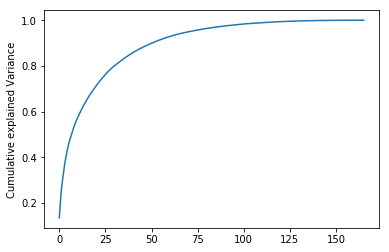

In [110]:
# Cumulative variance plot
plt.plot(var_cum)
plt.ylabel("Cumulative explained Variance")
plt.show()

In [111]:
# instantiate incrementalPCA
pca_ = IncrementalPCA(n_components=80)

In [112]:
# extract the transformed features
X_train_num_pca = pca_.fit_transform(X_train_num)

In [113]:
# print the shape of principal components
X_train_num_pca.shape

(20185, 80)

In [114]:
# Extract numeric variables of test set 
X_test_num = X_test.select_dtypes(include=['float64', 'int64'])

In [115]:
# transform to principal components
X_test_num_pca = pca_.transform(X_test_num)

In [116]:
# print shape
X_test_num_pca.shape

(8652, 80)

In [117]:
# Extract categorical variables
X_train_cat = X_train.select_dtypes(exclude=['float64', 'int64'])
X_train_cat.shape

(20185, 12)

In [118]:
# Combine all the features for train set
X_train_num_pca_df = pd.DataFrame(X_train_num_pca, 
                                  columns=['PC_'+str(i) for i in range(80)], index=X_train_cat.index)
X_train_pca = pd.concat([X_train_num_pca_df, X_train_cat], axis=1)

In [119]:
print(X_train_pca.shape)
print(y_train.shape)

(20185, 92)
(20185,)


In [120]:
# Combine all the features for test set
X_test_cat = X_test.select_dtypes(exclude=['float64', 'int64'])
X_test_num_pca_df = pd.DataFrame(X_test_num_pca, columns=['PC_'+str(i) for i in range(80)], index=X_test_cat.index)
X_test_pca = pd.concat([X_test_num_pca_df, X_test_cat], axis=1)

In [121]:
X_test_pca.shape

(8652, 92)

## Step 4 : Data Modelling

In [122]:
# Instantiate random Forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

#### Hyperparameter Tuning

In [123]:
params = {
    'max_depth': [10, 20, 25, 30],
    'min_samples_leaf': [5, 10, 20, 30],
    'n_estimators': [70 ,80, 85, 90]
}

In [124]:
# Grid search instantiation with F1 score
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [125]:
# search
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'n_estimators': [70, 80, 85, 90]},
             scoring='f1', verbose=1)

In [126]:
# best F1 Score 
grid_search.best_score_

0.5543434509051892

In [127]:
# Best Estimator Instance
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=10, n_estimators=90, n_jobs=-1,
                       random_state=42)

In [128]:
# print important features
rf_best.feature_importances_

array([5.82126181e-02, 7.02630584e-02, 1.78479306e-02, 1.41956250e-01,
       1.99488738e-02, 8.88879558e-03, 2.13531205e-02, 8.30092383e-03,
       1.02548268e-02, 8.39242614e-03, 8.88512721e-03, 6.07072635e-03,
       9.84353664e-03, 1.55516114e-02, 1.21441335e-02, 1.12896825e-02,
       5.72432894e-03, 7.57203312e-03, 7.17324512e-03, 5.88408080e-03,
       1.03629023e-02, 6.63062725e-03, 9.15871807e-03, 8.42733267e-03,
       8.83006346e-03, 5.91879657e-03, 9.58427835e-03, 5.39446392e-03,
       8.83618027e-03, 6.17572399e-03, 6.75412095e-03, 5.59972990e-03,
       5.27948587e-03, 5.36964964e-03, 4.79466218e-03, 6.11031064e-03,
       5.94781270e-03, 5.28066407e-03, 5.58543618e-03, 7.82508008e-03,
       9.55067706e-03, 1.06620039e-02, 5.64696910e-03, 6.32011744e-03,
       5.82941301e-03, 6.68659606e-03, 6.87785451e-03, 5.89339108e-03,
       4.96857550e-03, 1.10461242e-02, 5.55701098e-03, 5.49326153e-03,
       6.35232424e-03, 4.68095829e-03, 4.79765281e-03, 4.49763571e-03,
      

In [129]:
# Importance of variables into DataFrame
imp_df = pd.DataFrame({
    "Varname": X_train_pca.columns,
    "Imp": rf_best.feature_importances_
})

In [130]:
# Sorted importance
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,PC_3,0.141956
1,PC_1,0.070263
0,PC_0,0.058213
81,fb_user_8_2,0.048336
80,fb_user_8_1,0.042978
87,night_pck_user_8_2,0.033513
6,PC_6,0.021353
63,PC_63,0.021162
4,PC_4,0.019949
2,PC_2,0.017848


## Step 5 : Prediction

In [131]:
# Training set fit with best estimator
rf_best.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=10, n_estimators=90, n_jobs=-1,
                       random_state=42)

In [132]:
# train and test predictions
y_train_pred = rf_best.predict(X_train_pca)
y_test_pred = rf_best.predict(X_test_pca)

## Step 6 : Evaluation of Model

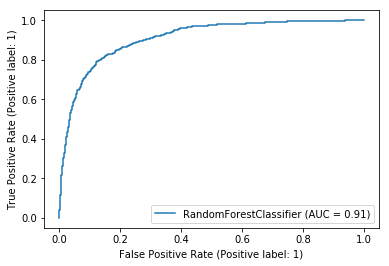

In [133]:
# Roc Curve
plot_roc_curve(rf_best, X_test_pca, y_test)
plt.show()

In [134]:
confusion2 = metrics.confusion_matrix(y_test, y_test_pred )
confusion2

array([[7529,  404],
       [ 287,  432]])

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# sensitivity 
recall = TP / float(TP+FN)

In [137]:
# precision
precision = TP/(TP+FP)

In [138]:
# specificity
TN / float(TN+FP)

0.9490734904827934

#### F1 score for Test set

In [139]:
(2*precision*recall) / (precision+recall)

0.5556270096463023

In [140]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7933
           1       0.52      0.60      0.56       719

    accuracy                           0.92      8652
   macro avg       0.74      0.77      0.76      8652
weighted avg       0.93      0.92      0.92      8652



## Step 7 : Identifying important predictor attributes 

In [141]:
# copying to df_identify_imp_attr
df_identify_imp_attr = df_2.copy()
df_identify_imp_attr.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28837 entries, 0 to 99997
Data columns (total 180 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    mobile_number          object 
 1    arpu_6                 float64
 2    arpu_7                 float64
 3    arpu_8                 float64
 4    onnet_mou_6            float64
 5    onnet_mou_7            float64
 6    onnet_mou_8            float64
 7    offnet_mou_6           float64
 8    offnet_mou_7           float64
 9    offnet_mou_8           float64
 10   roam_ic_mou_6          float64
 11   roam_ic_mou_7          float64
 12   roam_ic_mou_8          float64
 13   roam_og_mou_6          float64
 14   roam_og_mou_7          float64
 15   roam_og_mou_8          float64
 16   loc_og_t2t_mou_6       float64
 17   loc_og_t2t_mou_7       float64
 18   loc_og_t2t_mou_8       float64
 19   loc_og_t2m_mou_6       float64
 20   loc_og_t2m_mou_7       float64
 21   loc_og_t2m_mou_8       float64
 2

In [142]:

# removing mobile number
df_identify_imp_attr = df_identify_imp_attr.drop('mobile_number', axis = 1)

In [143]:
# Dividing data into X and y
y = df_identify_imp_attr.pop('churn')
X = df_identify_imp_attr

In [144]:
# Validating X and y divide
print(y.shape)
print(X.shape)

(28837,)
(28837, 178)


In [145]:
# Fitting Logistic model
lm = LogisticRegression(class_weight = 'balanced', random_state=100)
lm.fit(X, y)

LogisticRegression(class_weight='balanced', random_state=100)

In [146]:
# Running RFE (Recursive Feature Elimination) with output number of variables 15
rfe = RFE(lm, 15)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(class_weight='balanced', random_state=100),
    n_features_to_select=15)

In [147]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 123),
 ('arpu_7', False, 31),
 ('arpu_8', False, 71),
 ('onnet_mou_6', False, 90),
 ('onnet_mou_7', False, 150),
 ('onnet_mou_8', False, 76),
 ('offnet_mou_6', False, 130),
 ('offnet_mou_7', False, 127),
 ('offnet_mou_8', False, 45),
 ('roam_ic_mou_6', False, 93),
 ('roam_ic_mou_7', False, 58),
 ('roam_ic_mou_8', False, 33),
 ('roam_og_mou_6', False, 73),
 ('roam_og_mou_7', False, 55),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 59),
 ('loc_og_t2t_mou_7', False, 132),
 ('loc_og_t2t_mou_8', False, 13),
 ('loc_og_t2m_mou_6', False, 107),
 ('loc_og_t2m_mou_7', False, 112),
 ('loc_og_t2m_mou_8', False, 23),
 ('loc_og_t2f_mou_6', False, 8),
 ('loc_og_t2f_mou_7', False, 19),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 3),
 ('loc_og_t2c_mou_7', False, 63),
 ('loc_og_t2c_mou_8', False, 84),
 ('loc_og_mou_6', False, 113),
 ('loc_og_mou_7', False, 83),
 ('loc_og_mou_8', False, 24),
 ('std_og_t2t_mou_6', False, 139),
 ('std_og_t2t_mou_7', False, 1

In [148]:
# Checking columns with RFE support true
col = X.columns[rfe.support_]
col

Index(['roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_data_8', 'count_rech_2g_8',
       'roam_og_mou_diff', 'total_rech_num_diff'],
      dtype='object')

In [165]:
# creating copy of dataframe with rfe selected predictors
df_important_predictors = df_identify_imp_attr[col].copy()

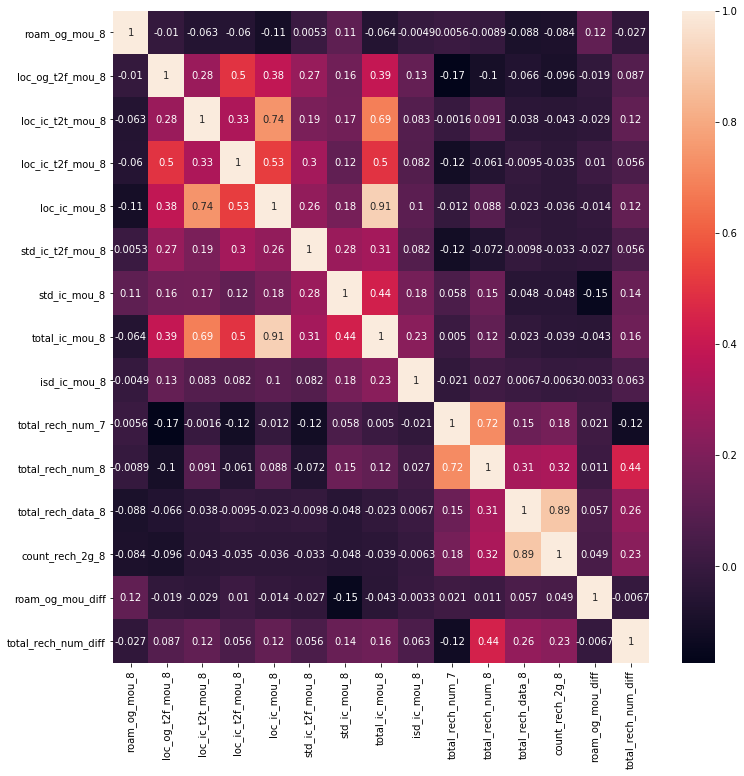

In [166]:
# Plotting heatmap to remove correlated features
plt.figure(figsize= (12,12))
sns.heatmap(df_important_predictors.corr(), annot=True)
plt.show()

In [167]:
list_pred_to_be_removed = []
pred_corr = df_important_predictors.corr()
for i in range(pred_corr.shape[0]):
    for j in range(i+1, pred_corr.shape[1]):
        if abs(pred_corr.iloc[i, j]) > 0.80:
            list_pred_to_be_removed.append(df_important_predictors.columns[j])
            print(df_important_predictors.columns[i], 
                  df_important_predictors.columns[j],
                  pred_corr.iloc[i, j])

loc_ic_mou_8 total_ic_mou_8 0.914610699830788
total_rech_data_8 count_rech_2g_8 0.8876670893946941


In [168]:
set_list_pred_to_be_removed = set(list_pred_to_be_removed)

In [169]:
# Creating list of columns to be dropped from above heatmap
drop_columns_corr = list(set_list_pred_to_be_removed)

In [170]:
# dropping columns based on above correlation numbers
df_important_predictors = df_important_predictors.drop(drop_columns_corr, axis=1)

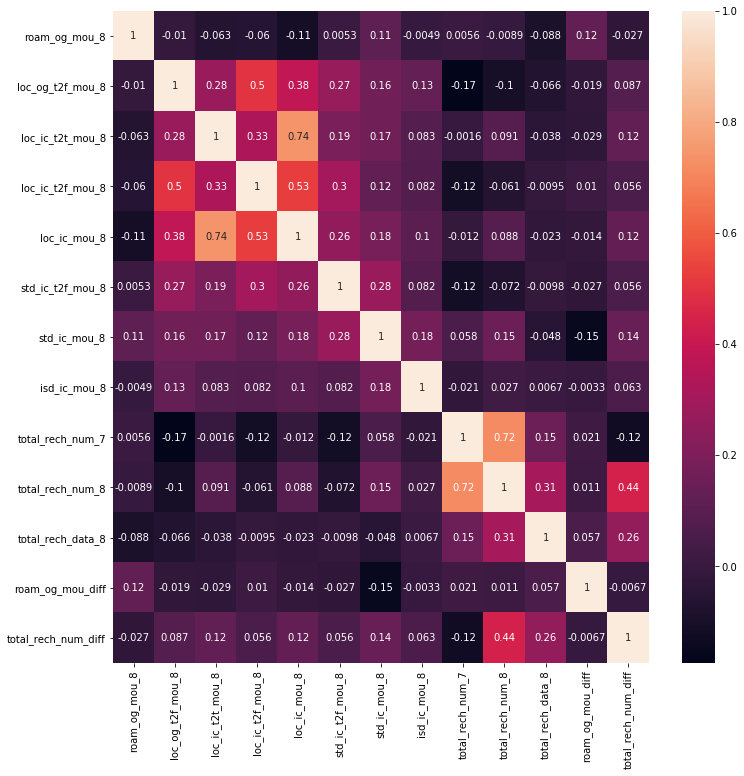

In [171]:
# Plotting heatmap to remove correlated features
plt.figure(figsize= (12,12))
sns.heatmap(df_important_predictors.corr(), annot=True)
plt.show()

In [172]:
# printing important predictors
df_important_predictors.columns

Index(['roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_data_8', 'roam_og_mou_diff', 'total_rech_num_diff'],
      dtype='object')

In [173]:
# Creating list of important predictors and adding churn for pairplot
important_predictors = df_important_predictors.columns.tolist()
print(important_predictors)

['roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_data_8', 'roam_og_mou_diff', 'total_rech_num_diff']


In [198]:
# creating function to visualize barplot of churn vs important predictors

def barplot_imp_predictors(imp_pred):
    for i in imp_pred:
        plt.figure(figsize=(10,5))
        sns.barplot(data = df_2, y = i, x = 'churn', estimator = np.mean)

        

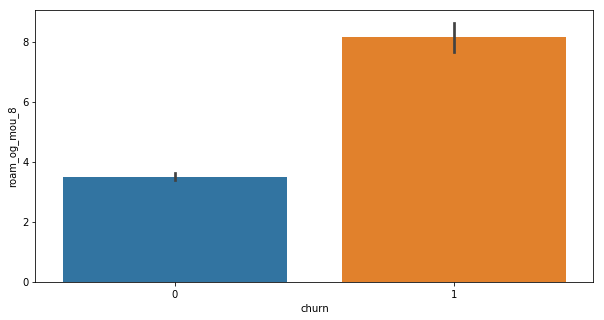

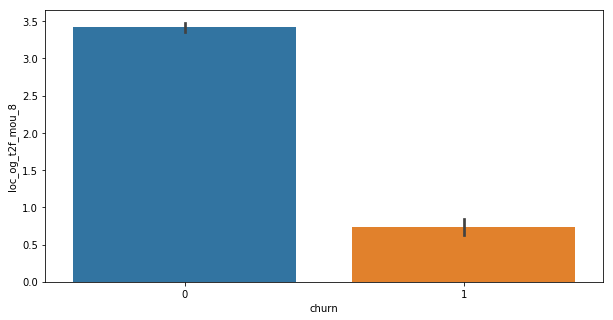

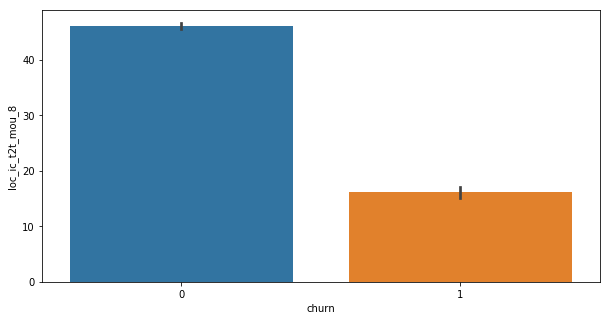

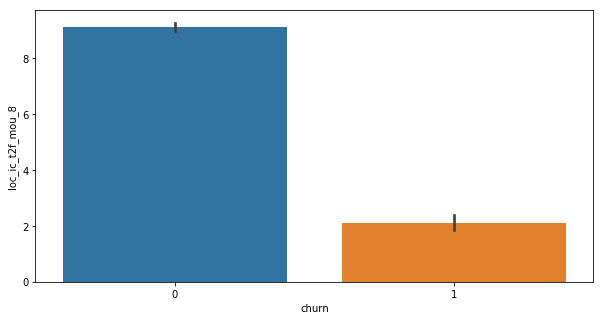

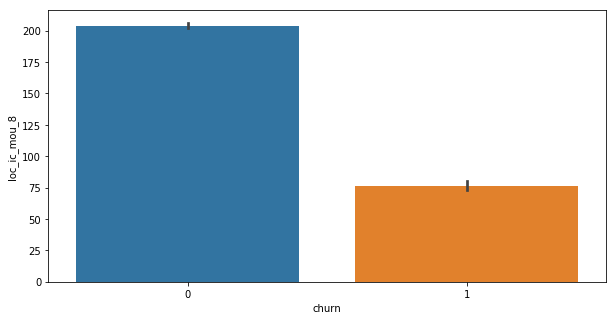

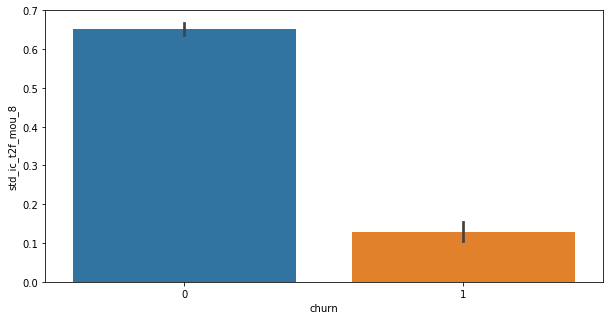

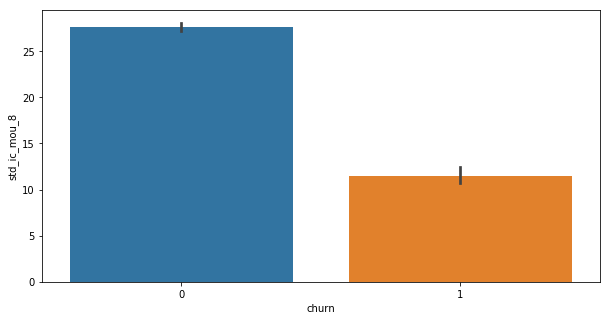

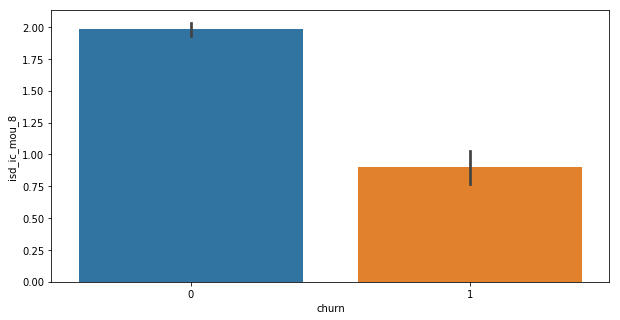

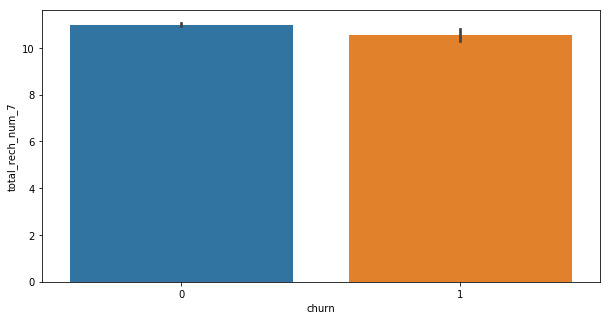

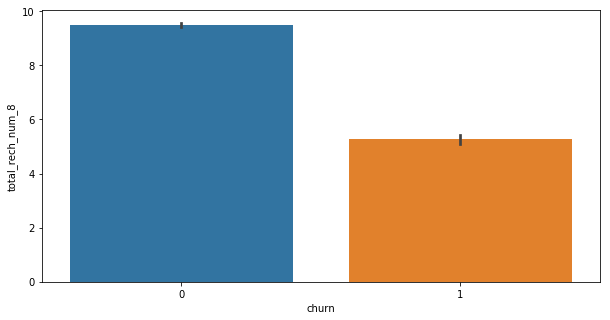

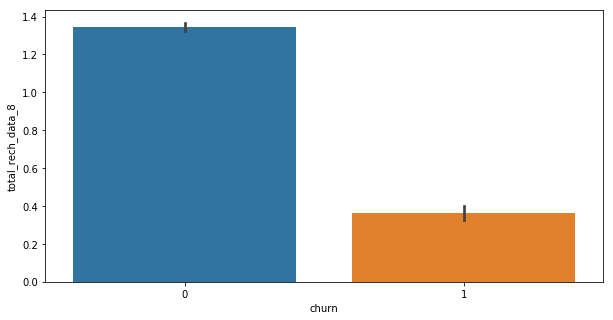

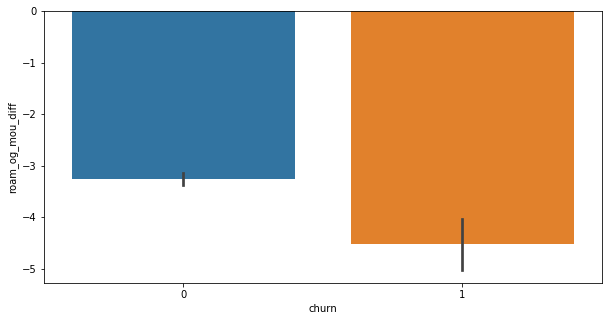

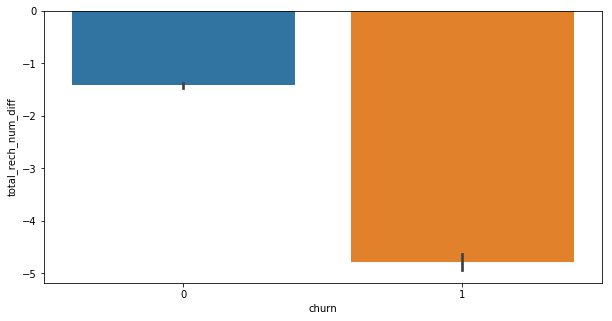

In [199]:
# barplot of important predictors against churn
barplot_imp_predictors(important_predictors)

## Conclusion

**Recommendations and Observations**:

The below are some of the important predictors that will help the telecom company make better decisions to avoid customer churn:

*'roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_data_8', 'roam_og_mou_diff', 'total_rech_num_diff'.*

1. It can be observed that, as roaming increases (especially in case where the outgoing calls are made more during roaming period), the churn rate also increases. The telecom company should focus on introducing new plans or schemes to support customer who are on roaming network.

2. If the total recharge in the month of August is more, the probability of the customer to churn is less.

3. If there is a sudden dip in the 8th month usage (such as calls and data pack usages), the telecom company must send some promotional offers to ensure the customer is retained.

4. If the difference between 8th month recharge and average of 6th and 7th month recharge is very less or in negative, then it is advisable the telecom company must send some promotional offers to ensure the customer is retained.

5. Additionally, it would be recommended to send frequent survey forms which will help the company come up with customer focussed offerings.